Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPooling2D
from glob import glob


In [2]:
## If you are using the data by mounting the google drive, use the following :
## from google.colab import drive
## drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [3]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path(r"C:\Users\sonim\OneDrive\Desktop\Data science\Neural Networks\Skin cancer ISIC The International Skin Imaging Collaboration\Train")
data_dir_test = pathlib.Path(r"C:\Users\sonim\OneDrive\Desktop\Data science\Neural Networks\Skin cancer ISIC The International Skin Imaging Collaboration\Test")

In [4]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [5]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [6]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,seed=123,validation_split=0.2,subset='training',image_size=(img_height,img_width),batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [7]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,seed=123,validation_split=0.2,subset='validation',image_size=(img_height,img_width),batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [8]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

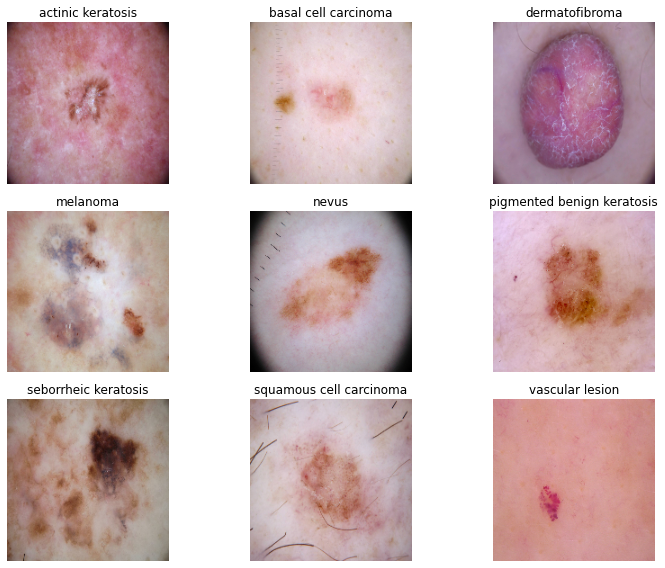

In [9]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize


fig = plt.figure(figsize=(11,8))
for i in range(len(class_names)):
    filtered_ds = train_ds.filter(lambda x, l: tf.math.equal(l[0],i))
    for image,label in filtered_ds.take(1):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(image[0].numpy().astype('uint8'))
        plt.title(class_names[label.numpy()[0]])
        plt.axis('off')
plt.tight_layout()
        
    
    

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [10]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [57]:
### Your code goes here

num_classes = 9

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])




### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [12]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='Adam',
              loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [13]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

### Train the model

In [14]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 18s 255ms/step - loss: 1.9810 - accuracy: 0.2623 - val_loss: 1.7693 - val_accuracy: 0.3669
Epoch 2/20
56/56 [==============================] - 15s 261ms/step - loss: 1.6914 - accuracy: 0.4012 - val_loss: 1.6594 - val_accuracy: 0.4407
Epoch 3/20
56/56 [==============================] - 14s 256ms/step - loss: 1.4837 - accuracy: 0.4821 - val_loss: 1.4851 - val_accuracy: 0.4877
Epoch 4/20
56/56 [==============================] - 14s 255ms/step - loss: 1.4078 - accuracy: 0.5056 - val_loss: 1.4783 - val_accuracy: 0.4832
Epoch 5/20
56/56 [==============================] - 14s 252ms/step - loss: 1.3250 - accuracy: 0.5458 - val_loss: 1.4047 - val_accuracy: 0.5280
Epoch 6/20
56/56 [==============================] - 14s 253ms/step - loss: 1.2333 - accuracy: 0.5653 - val_loss: 1.5703 - val_accuracy: 0.5235
Epoch 7/20
56/56 [==============================] - 14s 253ms/step - loss: 1.1335 - accuracy: 0.6010 - val_loss: 1.4493 - val_accuracy: 0.5078

### Visualizing training results

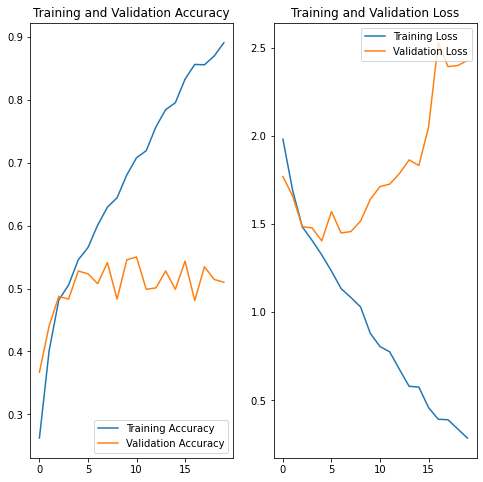

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### There's a huge gap observed between training and testing accuracy. Training is higher so its clearly an overfitting model.

### Write your findings here

In [16]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 

Data_augumentation = keras.Sequential([layers.experimental.preprocessing.RandomFlip('horizontal',input_shape=(img_height,img_width,3)),layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1)])







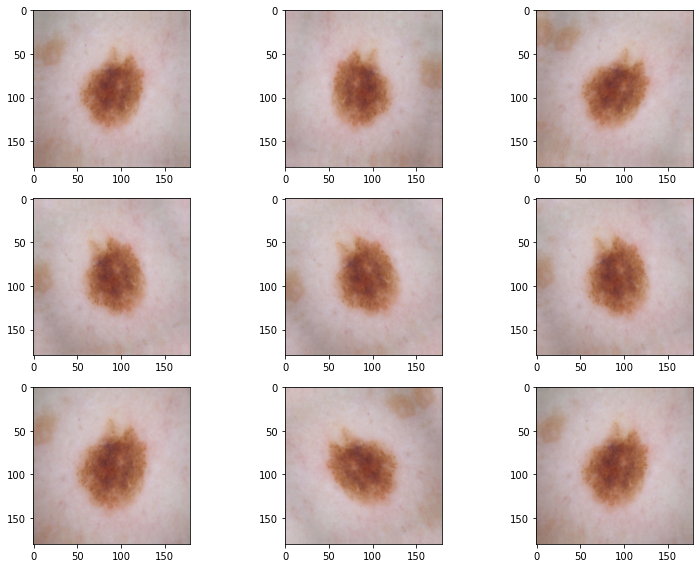

In [17]:
# Todo, visualize how your augmentation strategy works for one instance of training image.

fig = plt.figure(figsize=(11,8))
for images,name in train_ds.take(1):
    for i in range(9):
        augumented_images = Data_augumentation(images)
        ax= plt.subplot(3,3,i+1)
        plt.imshow(augumented_images[0].numpy().astype('uint8'))

plt.tight_layout()
        
        

### Todo:
### Create the model, compile and train the model


In [58]:
## You can use Dropout layer if there is an evidence of overfitting in your findings


model = Sequential()
model.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)))
model.add(Conv2D(16, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(32, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.15))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(num_classes))




### Compiling the model

In [19]:
## Your code goes here

model.compile(optimizer='Adam',
              loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [20]:
## Your code goes here, note: train your model for 20 epochs

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)


Epoch 1/20
56/56 [==============================] - 15s 257ms/step - loss: 2.0954 - accuracy: 0.2266 - val_loss: 1.8946 - val_accuracy: 0.2573
Epoch 2/20
56/56 [==============================] - 14s 253ms/step - loss: 1.7522 - accuracy: 0.3750 - val_loss: 1.7318 - val_accuracy: 0.3445
Epoch 3/20
56/56 [==============================] - 14s 253ms/step - loss: 1.6370 - accuracy: 0.4062 - val_loss: 1.5033 - val_accuracy: 0.4877
Epoch 4/20
56/56 [==============================] - 14s 253ms/step - loss: 1.4613 - accuracy: 0.4799 - val_loss: 1.4779 - val_accuracy: 0.4966
Epoch 5/20
56/56 [==============================] - 14s 255ms/step - loss: 1.3867 - accuracy: 0.5134 - val_loss: 1.4162 - val_accuracy: 0.5235
Epoch 6/20
56/56 [==============================] - 14s 254ms/step - loss: 1.3107 - accuracy: 0.5552 - val_loss: 1.5831 - val_accuracy: 0.4720
Epoch 7/20
56/56 [==============================] - 14s 255ms/step - loss: 1.2173 - accuracy: 0.5826 - val_loss: 1.5087 - val_accuracy: 0.5347

### Visualizing the results

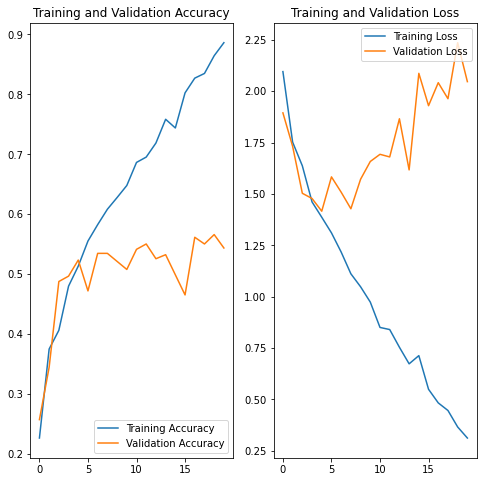

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?:
#### Conclusion:
For the change, we tried changing architecture little bit and we also added the dropout in order to avoid the overfitting but there were no evidence of any improvement.Infact due to addition of dropout, train accuracy also fall down upto some extent and somehow lesser comparatively lesser difference was found between train accuracy and validation accuracy.


#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [22]:
path_list=[]
lesion_list=[]
for i in class_names:
      
    for j in data_dir_train.glob(i+'/*.jpg'):
        path_list.append(str(j))
        lesion_list.append(i)
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,C:\Users\sonim\OneDrive\Desktop\Data science\N...,actinic keratosis
1,C:\Users\sonim\OneDrive\Desktop\Data science\N...,actinic keratosis
2,C:\Users\sonim\OneDrive\Desktop\Data science\N...,actinic keratosis
3,C:\Users\sonim\OneDrive\Desktop\Data science\N...,actinic keratosis
4,C:\Users\sonim\OneDrive\Desktop\Data science\N...,actinic keratosis
...,...,...
2234,C:\Users\sonim\OneDrive\Desktop\Data science\N...,vascular lesion
2235,C:\Users\sonim\OneDrive\Desktop\Data science\N...,vascular lesion
2236,C:\Users\sonim\OneDrive\Desktop\Data science\N...,vascular lesion
2237,C:\Users\sonim\OneDrive\Desktop\Data science\N...,vascular lesion


In [23]:
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,C:\Users\sonim\OneDrive\Desktop\Data science\N...,actinic keratosis
1,C:\Users\sonim\OneDrive\Desktop\Data science\N...,actinic keratosis
2,C:\Users\sonim\OneDrive\Desktop\Data science\N...,actinic keratosis
3,C:\Users\sonim\OneDrive\Desktop\Data science\N...,actinic keratosis
4,C:\Users\sonim\OneDrive\Desktop\Data science\N...,actinic keratosis
...,...,...
2234,C:\Users\sonim\OneDrive\Desktop\Data science\N...,vascular lesion
2235,C:\Users\sonim\OneDrive\Desktop\Data science\N...,vascular lesion
2236,C:\Users\sonim\OneDrive\Desktop\Data science\N...,vascular lesion
2237,C:\Users\sonim\OneDrive\Desktop\Data science\N...,vascular lesion


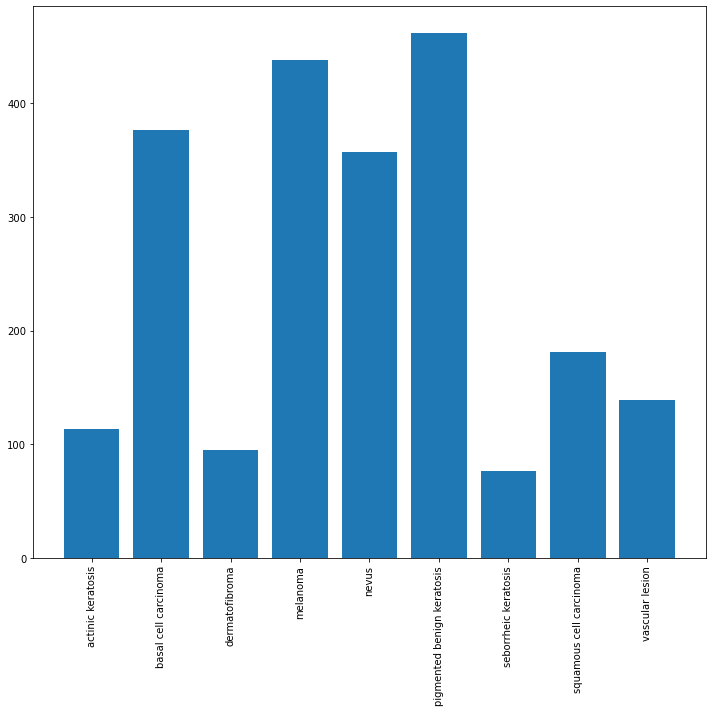

In [24]:
## Your code goes here.

count=[]
for i in class_names:
    count.append(len(list(data_dir_train.glob(i+'/*.jpg'))))
plt.figure(figsize=(10,10))
plt.bar(class_names,count)

plt.xticks(rotation='vertical')

plt.tight_layout()



#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples? 
'seborrheic keratosis' has leas number of samples.
#### - Which classes dominate the data in terms proportionate number of samples?
'pigmented benign keratosis' has highest number of samples


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [25]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [41]:
import Augmentor
path_to_training_dataset= r"C:\Users\sonim\OneDrive\Desktop\Data science\Neural Networks\Skin cancer ISIC The International Skin Imaging Collaboration\Train"

for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset +'/'+ i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1A7804AF1F0>:   1%| | 3/500 [00:00<01:14,  6.64 Samples/s]

Initialised with 114 image(s) found.
Output directory set to C:\Users\sonim\OneDrive\Desktop\Data science\Neural Networks\Skin cancer ISIC The International Skin Imaging Collaboration\Train/actinic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1A7805C9DF0>: 100%|█| 500/500 [00:05<00:00, 88.84 Samples/
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1A780448820>:   2%| | 11/500 [00:00<01:0

Initialised with 376 image(s) found.
Output directory set to C:\Users\sonim\OneDrive\Desktop\Data science\Neural Networks\Skin cancer ISIC The International Skin Imaging Collaboration\Train/basal cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1A780598D30>: 100%|█| 500/500 [00:05<00:00, 83.70 Samples/
Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1A7A9E87430>:   1%| | 7/500 [00:00<01:11,  6.87 Samples/s]

Initialised with 95 image(s) found.
Output directory set to C:\Users\sonim\OneDrive\Desktop\Data science\Neural Networks\Skin cancer ISIC The International Skin Imaging Collaboration\Train/dermatofibroma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1A780535D90>: 100%|█| 500/500 [00:05<00:00, 92.51 Samples/
Executing Pipeline:   0%|                                                                | 0/500 [00:00<?, ? Samples/s]

Initialised with 438 image(s) found.
Output directory set to C:\Users\sonim\OneDrive\Desktop\Data science\Neural Networks\Skin cancer ISIC The International Skin Imaging Collaboration\Train/melanoma\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=3008x2000 at 0x1A780BEDD90>: 100%|█| 500/500 [00:24<0
Executing Pipeline:   0%|                                                                | 0/500 [00:00<?, ? Samples/s]

Initialised with 357 image(s) found.
Output directory set to C:\Users\sonim\OneDrive\Desktop\Data science\Neural Networks\Skin cancer ISIC The International Skin Imaging Collaboration\Train/nevus\output.

Processing <PIL.Image.Image image mode=RGB size=1504x1129 at 0x1A780BE4D30>: 100%|█| 500/500 [00:25<00:00, 19.87 Sample
Executing Pipeline:   0%|                                                                | 0/500 [00:00<?, ? Samples/s]

Initialised with 462 image(s) found.
Output directory set to C:\Users\sonim\OneDrive\Desktop\Data science\Neural Networks\Skin cancer ISIC The International Skin Imaging Collaboration\Train/pigmented benign keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1A78055A190>: 100%|█| 500/500 [00:05<00:00, 89.03 Samples/
Executing Pipeline:   0%|                                                                | 0/500 [00:00<?, ? Samples/s]

Initialised with 77 image(s) found.
Output directory set to C:\Users\sonim\OneDrive\Desktop\Data science\Neural Networks\Skin cancer ISIC The International Skin Imaging Collaboration\Train/seborrheic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x1A7801A0A30>: 100%|█| 500/500 [00:12<00:00, 39.70 Samples
Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1A78091FA30>:   0%| | 2/500 [00:00<00:55,  9.03 Samples/s]

Initialised with 181 image(s) found.
Output directory set to C:\Users\sonim\OneDrive\Desktop\Data science\Neural Networks\Skin cancer ISIC The International Skin Imaging Collaboration\Train/squamous cell carcinoma\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1A780BB79D0>: 100%|█| 500/500 [00:05<00:
Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1A7835011F0>:   1%| | 6/500 [00:00<01:06,  7.48 Samples/s]

Initialised with 139 image(s) found.
Output directory set to C:\Users\sonim\OneDrive\Desktop\Data science\Neural Networks\Skin cancer ISIC The International Skin Imaging Collaboration\Train/vascular lesion\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1A7A9E7D7F0>: 100%|█| 500/500 [00:05<00:00, 91.87 Samples/


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [42]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [43]:
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_new

['C:\\Users\\sonim\\OneDrive\\Desktop\\Data science\\Neural Networks\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_311dbcc0-c0f6-4dde-b7d6-e607f03f99be.jpg',
 'C:\\Users\\sonim\\OneDrive\\Desktop\\Data science\\Neural Networks\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_453fe46b-ee6e-4786-bfda-43e6b4225a79.jpg',
 'C:\\Users\\sonim\\OneDrive\\Desktop\\Data science\\Neural Networks\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_50753ff0-711a-495b-941c-85400fe9061d.jpg',
 'C:\\Users\\sonim\\OneDrive\\Desktop\\Data science\\Neural Networks\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_70326273-c078-4844-a76b-58b

In [44]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [45]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [46]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

In [47]:
new_df['Label'].value_counts()

pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [48]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [50]:
data_dir_train=r"C:\Users\sonim\OneDrive\Desktop\Data science\Neural Networks\Skin cancer ISIC The International Skin Imaging Collaboration\Train"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [51]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset =  "validation" ,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [52]:
## your code goes here

model = Sequential()
model.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)))
model.add(Conv2D(16, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.25))

model.add(Conv2D(32, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.25))

model.add(Conv2D(64, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(num_classes))

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [53]:
## your code goes here

model.compile(optimizer='Adam',
              loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [54]:
#epochs = 30
## Your code goes here, use 50 epochs.
epochs=50
history = history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50
169/169 [==============================] - 80s 467ms/step - loss: 2.2891 - accuracy: 0.1343 - val_loss: 2.1675 - val_accuracy: 0.1411
Epoch 2/50
169/169 [==============================] - 79s 463ms/step - loss: 1.9187 - accuracy: 0.2730 - val_loss: 1.6010 - val_accuracy: 0.4009
Epoch 3/50
169/169 [==============================] - 78s 461ms/step - loss: 1.4776 - accuracy: 0.4369 - val_loss: 1.4194 - val_accuracy: 0.4707
Epoch 4/50
169/169 [==============================] - 78s 461ms/step - loss: 1.3305 - accuracy: 0.5020 - val_loss: 1.3312 - val_accuracy: 0.4944
Epoch 5/50
169/169 [==============================] - 78s 460ms/step - loss: 1.1837 - accuracy: 0.5601 - val_loss: 1.2462 - val_accuracy: 0.5145
Epoch 6/50
169/169 [==============================] - 79s 462ms/step - loss: 1.0656 - accuracy: 0.6046 - val_loss: 1.0991 - val_accuracy: 0.5999
Epoch 7/50
169/169 [==============================] - 79s 464ms/step - loss: 0.9799 - accuracy: 0.6411 - val_loss: 1.0444 - val_ac

#### **Todo:**  Visualize the model results

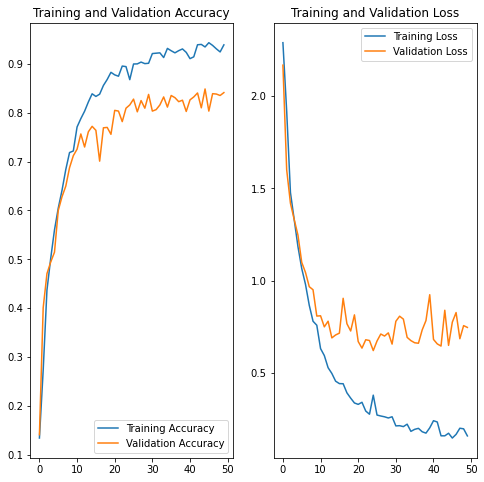

In [55]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



-After augmenting simultaneously with managing imbalance we were able to acheive best results among all train accuracy-93.88% and validation accuracy-84.11%


-So model was neither over fitting nor under fitting.


-And its a good model to consider.